In [33]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('Terraced_stl_decomposition.csv')

In [35]:
df

,Date,Trend,Seasonal,Residual
0,1995-02-01,0.513053,0.122922,0.364025
1,1995-01-01,0.508468,0.034203,0.457328
2,1995-07-01,0.503705,0.286068,0.210227
3,1995-06-01,0.498462,-0.088130,-0.410332
4,1995-03-01,0.492163,0.254249,0.253588
...,...,...,...,...
22653981,2023-01-01,0.137820,-0.236694,0.098874
22653982,2023-05-01,0.130684,0.233131,-0.363815
22653983,2023-04-01,0.123982,0.174935,-0.298917
22653984,2023-06-01,0.117570,0.126576,-0.244146


In [36]:
#Convert Date to DateTime
df['Date'] = pd.to_datetime(df['Date'])

In [37]:
df.set_index('Date', inplace = True)

In [38]:
#Change data type from float64 to float8 to optimise memory demand
#df = df.astype(float)
df = df.astype({'Trend': 'float32', 'Seasonal': 'float32',  'Residual': 'float32'})

In [39]:
#Choose column to analyse
col_anal = "Trend"

In [40]:
df2plot = df[col_anal]

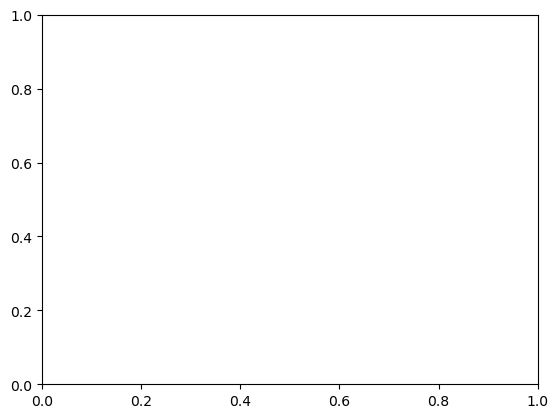

In [41]:
# Plot ACF
fig, ax = plt.subplots()
acf_values = acf(df2plot)

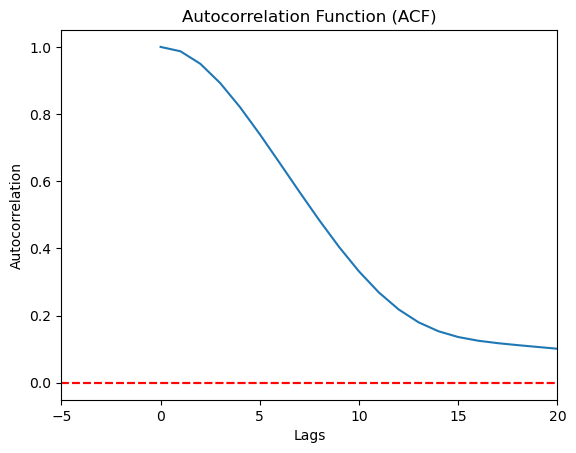

In [43]:
# Set appropriate lags (adjust based on data characteristics)
plt.xlim(-5, 20)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.axhline(y=1.96/np.sqrt(len(df2plot)), color='r', linestyle='--', alpha=0.7)
plt.axhline(y=-1.96/np.sqrt(len(df2plot)), color='r', linestyle='--', alpha=0.7)
plt.plot(acf_values)
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF)")
plt.show()


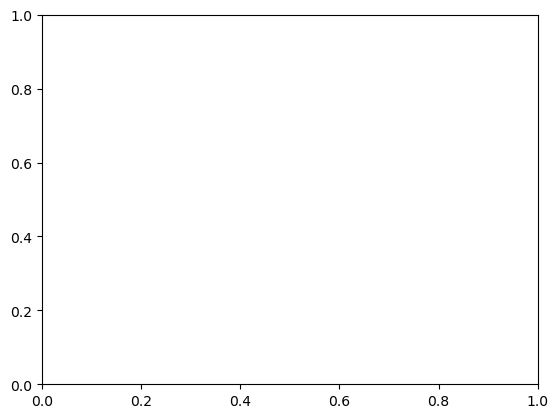

In [44]:
# Plot PACF
fig, ax = plt.subplots()
pacf_values = pacf(df2plot)

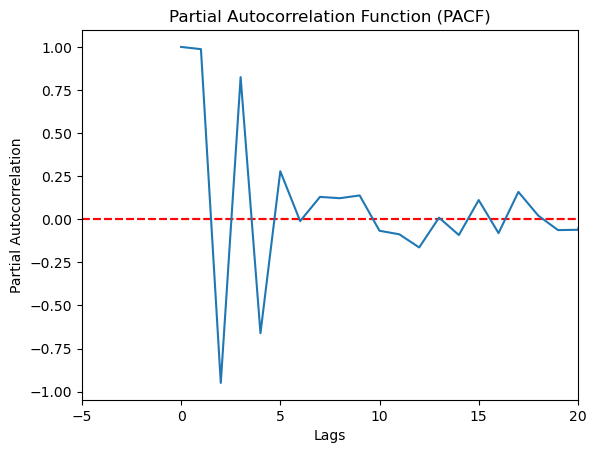

In [45]:
# Set appropriate lags (adjust based on data characteristics)
plt.xlim(-5, 20)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.axhline(y=1.96/np.sqrt(len(df2plot)), color='r', linestyle='--', alpha=0.7)
plt.axhline(y=-1.96/np.sqrt(len(df2plot)), color='r', linestyle='--', alpha=0.7)
plt.plot(pacf_values)
plt.xlabel("Lags")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()